# The Weight And Height Classification Project

In this notebook I'm going to solve a classification problem to predict the gender based
on the weight and height.

And in the second part in a different notebook of the project I'm going to use the same data to solve a regression
problem and to predict the weight based on gender and height

In [1]:
from pandas import read_csv, set_option

In [2]:
filename = 'weight-height.csv'
Dataset = read_csv(filename)

Let's check if there is any missing data

In [3]:
Missing_Values_Table = Dataset.isnull().sum()
print(Missing_Values_Table)

Gender    0
Height    0
Weight    0
dtype: int64


As we can see there are no missing values

In [4]:
# Let's look at some statistics
peek = Dataset.head(20)
shape = Dataset.shape
types = Dataset.dtypes

print("The first 20 datapoints are:")
print(peek)
print("\n")

The first 20 datapoints are:
   Gender     Height      Weight
0    Male  73.847017  241.893563
1    Male  68.781904  162.310473
2    Male  74.110105  212.740856
3    Male  71.730978  220.042470
4    Male  69.881796  206.349801
5    Male  67.253016  152.212156
6    Male  68.785081  183.927889
7    Male  68.348516  167.971110
8    Male  67.018950  175.929440
9    Male  63.456494  156.399676
10   Male  71.195382  186.604926
11   Male  71.640805  213.741169
12   Male  64.766329  167.127461
13   Male  69.283070  189.446181
14   Male  69.243732  186.434168
15   Male  67.645620  172.186930
16   Male  72.418317  196.028506
17   Male  63.974326  172.883470
18   Male  69.640060  185.983958
19   Male  67.936005  182.426648




In [5]:
print(f"The dimensions of the Dataset is : {shape}")
    
print("The types of the data is:")
print(types)


The dimensions of the Dataset is : (10000, 3)
The types of the data is:
Gender     object
Height    float64
Weight    float64
dtype: object


Here we can see the descriptive statistics of the data:

In [6]:
#Descriptive Statistics
set_option('display.width',100)
set_option('precision',3)
description = Dataset.describe()

print(description)

          Height     Weight
count  10000.000  10000.000
mean      66.368    161.440
std        3.848     32.108
min       54.263     64.700
25%       63.506    135.818
50%       66.318    161.213
75%       69.174    187.170
max       78.999    269.990


Let's look at the class distribution is:

In [7]:
class_counts = Dataset.groupby('Gender').size()      
print(class_counts)

Gender
Female    5000
Male      5000
dtype: int64


The correlations between the attributes pairwise is:

In [8]:
# Pairwise Pearson correlations
correlations = Dataset.corr(method='pearson')
print(correlations)

        Height  Weight
Height   1.000   0.925
Weight   0.925   1.000


Let's Visualize the data, The Histogramme of the data is:

In [9]:
from matplotlib import pyplot

#histogrammes
Dataset.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000008DE0940>,
      dtype=object)

We can see some nice Gaussian distributions

Let's plot the data to see how it looks like: 

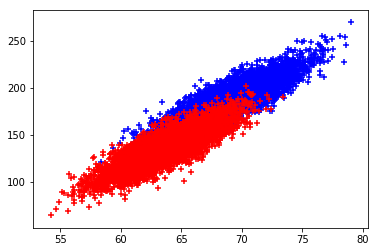

In [10]:
#Scatter plots
array = Dataset.values
X = array[:,1:]
Y = array[:,0]

for i in range(len(Y)):
    if Y[i] == 'Male':
        pyplot.scatter(X[i][0],X[i][1],color = 'blue', marker = '+')
    else:
        pyplot.scatter(X[i][0],X[i][1],color = 'red', marker = '+')
    
pyplot.show()

## The machine learning part

In [11]:
from sklearn.model_selection import train_test_split

validation_size = 0.2
seed = 7

X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,
        test_size=validation_size, random_state=seed)

In [12]:
"""Importing the Classification Algorithms"""

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Let's define the list of classification algorithms

In [13]:
models = []
models.append(('LR', LogisticRegression(solver = 'liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma = 'auto')))

In [14]:
from sklearn.model_selection import KFold, cross_val_score

results = []
names = []
n_folds = 10
scoring = 'accuracy'
for name,model in models:
    kfold = KFold(n_splits = n_folds, random_state = seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print(f'{name}: {cv_results.mean()}, {cv_results.std()}')

LR: 0.92075, 0.008085480814398112
KNN: 0.91175, 0.006204836822995415
CART: 0.875875, 0.011125000000000001
NB: 0.888875, 0.013514459848621405
SVM: 0.9200000000000002, 0.007582875444051561


Let's apply some tuning to the best performing algorithm

In [15]:
# Logistic regression Algorithm tuning
import numpy
from sklearn.model_selection import GridSearchCV

C_values = numpy.array([0.1,0.3,0.5,0.7,0.9,1.0,1.3,1.5,1.7,2.0])
param_grid = dict(C=C_values)
model = LogisticRegression(solver = 'liblinear')
kfold = KFold(n_splits=10, random_state=7)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train, Y_train)
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"{mean} ({stdev}) with: {param}")

Best: 0.92075 using {'C': 0.1}
0.92075 (0.008085480814398112) with: {'C': 0.1}
0.92075 (0.008085480814398112) with: {'C': 0.3}
0.92075 (0.008085480814398112) with: {'C': 0.5}
0.92075 (0.008085480814398112) with: {'C': 0.7}
0.92075 (0.008085480814398112) with: {'C': 0.9}
0.92075 (0.008085480814398112) with: {'C': 1.0}
0.92075 (0.008085480814398112) with: {'C': 1.3}
0.92075 (0.008085480814398112) with: {'C': 1.5}
0.92075 (0.008085480814398112) with: {'C': 1.7}
0.92075 (0.008085480814398112) with: {'C': 2.0}


## Prediction Time

In [16]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# prepare the model
model = LogisticRegression(solver = 'liblinear')
model.fit(X_train, Y_train)

# estimate accuracy on validation dataset
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9135
[[906  90]
 [ 83 921]]
              precision    recall  f1-score   support

      Female       0.92      0.91      0.91       996
        Male       0.91      0.92      0.91      1004

   micro avg       0.91      0.91      0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000

